<a href="https://colab.research.google.com/github/KelianF/MachineLearning/blob/master/Supervised/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Linear Regression
## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Set up data and display it

Text(0, 0.5, 'y')

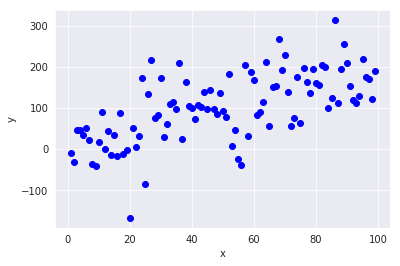

In [3]:
#Defining the x array. 
x=np.array(range(1,100)) 


#Defining the y array. 
y=10+2*x.ravel() 
y=y+np.random.normal(loc=0, scale=70, size=99)


plt.scatter(x,y, color='blue')
plt.xlabel('x') 
plt.ylabel('y')


# Using Scikit-Learn
## Imports


In [0]:
from sklearn.linear_model import LinearRegression

## Code

In [0]:
Reg = LinearRegression()
Reg.fit(x[:, np.newaxis],y[:,np.newaxis])
y_hat=Reg.predict(x[:, np.newaxis])


In [6]:
print('Intercept is: ' + str(round(Reg.intercept_[0],3)))
print('Coef is/are: ' + str(Reg.coef_))

print('R2 is: ' + str(round(Reg.score(x[:, np.newaxis],y[:, np.newaxis]),2))) 


Intercept is: 9.195
Coef is/are: [[1.85491265]]
R2 is: 0.4


## Graphical representation

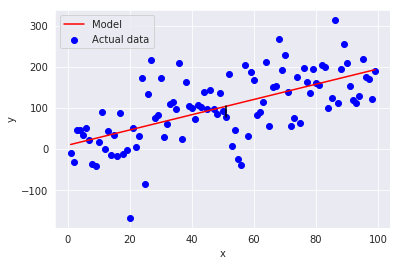

In [7]:
plt.scatter(x,y, color='blue', label ='Actual data') 
plt.plot(x,y_hat, color='red', label ='Model')
plt.plot((x[50],x[50]) ,(y[50], y_hat[50]), color='black')
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.show()

This Graphical representation, shows the data and our model. 

I have added a line representing the difference between our model and the actual data, in econometrics, this is called ε. 

Hence, a regression is a minimisation problem of the sum of all the ε squared.


Furthermore, the regression performed here is of the form Y on X, which explais why the ε is parallel to the Y axis. If the opposite was computed, the ε looked at for minimization would've been parallel to the X axis.

# Using Scipy

## imports

In [0]:
from scipy import stats

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [10]:
print('Intercept is: ' + str(round(intercept,3)))
print('Coef is/are: ' + str(slope))

print('R2 is: ' + str(round(r_value**2,2))) 



Intercept is: 9.195
Coef is/are: 1.8549126506252636
R2 is: 0.4


# Using TensorFlow

## Import

In [0]:
import tensorflow as tf

## Code

In [12]:
# Defining the placeholder that we can input in the optimizer.

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

# Declaring two trainable TF variables for the weight and bias (initialized randomly), and two parameters: The learning rate and the epochs.

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

learning_rate = 0.01
training_epochs = 1000

# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x)) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

W0708 08:48:39.933254 140016116971392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 

        if (epoch + 1) % 50 == 0:  # Displaying the result after every 50 epochs 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})  # Storing necessary values to be used outside the Session 
    weight = sess.run(W) 
    bias = sess.run(b) 

# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, ",Weight =", weight, ",bias =", bias, '\n') 

Epoch 50 : cost = 2098.5574 W = 1.9093521 b = -0.4990548
Epoch 100 : cost = 2097.3196 W = 1.9061018 b = -0.17732194
Epoch 150 : cost = 2096.2 W = 1.9030826 b = 0.12155943
Epoch 200 : cost = 2095.1868 W = 1.9002777 b = 0.39921185
Epoch 250 : cost = 2094.2678 W = 1.897672 b = 0.6571437
Epoch 300 : cost = 2093.4336 W = 1.8952515 b = 0.89675426
Epoch 350 : cost = 2092.676 W = 1.8930029 b = 1.1193463
Epoch 400 : cost = 2091.9863 W = 1.890914 b = 1.3261288
Epoch 450 : cost = 2091.3586 W = 1.8889734 b = 1.5182256
Epoch 500 : cost = 2090.786 W = 1.8871706 b = 1.6966811
Epoch 550 : cost = 2090.2637 W = 1.8854959 b = 1.862456
Epoch 600 : cost = 2089.7861 W = 1.8839402 b = 2.0164576
Epoch 650 : cost = 2089.3499 W = 1.8824949 b = 2.1595242
Epoch 700 : cost = 2088.9504 W = 1.8811523 b = 2.2924297
Epoch 750 : cost = 2088.5845 W = 1.8799051 b = 2.415885
Epoch 800 : cost = 2088.249 W = 1.8787465 b = 2.5305793
Epoch 850 : cost = 2087.9414 W = 1.8776702 b = 2.6371162
Epoch 900 : cost = 2087.6592 W = 1.8

In this case, the method to solve the linear regression minimization problem is to perform a gradiant descent, the reason it has not been performed that way in the previous two cases is that linear regression has a closed formula (More explanation below), which is quite rare in optimization problem.

Hence, the TensorFlow solution is more general for optimization problems.

## Graphical representation

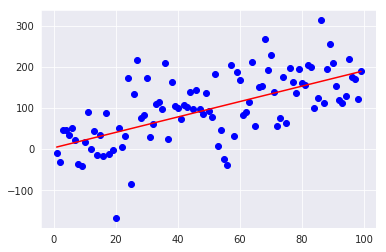

In [14]:
plt.plot(x, y, 'ro', color='blue') 
plt.plot(x, predictions, color='red')

# Linear Regression from scratch and explanation

The OLS Equation looks as follow:
\begin{equation}
y = X\hat{β} + ϵ\end{equation}

In this equation:
β is the vector of weight of the X independent variables, ϵ represent the error vector.

Hence, the Sum of Squred Residual, can be written as follow:
\begin{equation}
e = y − X\hat{β}\end{equation}


Which gives us:
\begin{equation}
e'e = (y − X\hat{β})'(y − X\hat{β})\end{equation}
       \begin{equation}
    = y'y - \hat{β}'X'y - y'X\hat{β} + β'X'Xβ\end{equation}
    \begin{equation}
    = y'y - 2\hat{β}'X'y + \hat{β}'X'X\hat{β}\end{equation}
    

Using the differential method to find the minimum:

\begin{equation}
\frac{∂e'e}{\hat{β}} = 2X'y + 2X'X\hat{β} = 0
\end{equation}
   
To check if it is indeed a minimum, it is possible to take the second derivative with respect to β, which would give us: 2X'X. Hence, so long as X has full rank, this is a positive definite matrix, and thus a minimum.
\begin{equation}
(X'X)\hat{β} = X'y
\end{equation}\begin{equation}
(X'X)^{-1}(X'X)\hat{β} = (X'X)^{-1}X'y
\end{equation}
By definition: \begin{equation} (X'X)^{-1}(X'X) = I \end{equation}

Giving us:
\begin{equation}
I \hat{β}  = (X'X)^{-1}X'y
\end{equation} 
\begin{equation}
\hat{β}  = (X'X)^{-1}X'y \end{equation}


       
       
       
       

In [47]:
# Let's first define X using the previous x and adding a first column of ones:

X = np.hstack((np.ones((len(x),1)) ,x[:, np.newaxis]))

# Now we can simply use the previously derived formula:
Intercept, Slope = np.linalg.inv(X.T @ X) @ (X.T @ y)

print('Intercept is: ' + str(round(Intercept,3)))
print('Coef is: ' + str(Slope))

Intercept is: 9.195
Coef is: 1.8549126506252618


This, Should, gives us the same values as previously obtained with Sklearn, Scipy and TensorFlow.